**Author:** Lisa Wallner  
**Description:** In this notebook a file 'df_repos_metadata.json' will be loaded and it's content analysed to get an insight of the GitHub repositories metadata.  

*Hint: If lines are created with support of a Large Language Model or the code is taken from another source, you find following hint at the end of the line: (generated with Microsoft Copilot) or (source: link_to_source)*

In [25]:
import pandas as pd # package for data manipulation
import json # package to work with .json
import matplotlib.pyplot as plt # package for visualization
import seaborn as sns

### Load data ---> richtiges json

In [26]:
file_path = '../data/df_repos_metadata.json' # filepath of input file
with open(file_path, 'r') as file: # JSON file is loaded and it contents saved within a variable
    loaded_data = json.load(file)

In [27]:
df = pd.DataFrame(data=loaded_data) # create dataframe from previous loaded JSON

In [28]:
len(df.columns)

32

In [29]:
df.head(3)

,id,name,full_name,html_url,description,url,labels_url,created_at,updated_at,pushed_at,...,license,allow_forking,topics,visibility,forks,open_issues,watchers,default_branch,score,language_spoken
0,619825247,LMFlow,OptimalScale/LMFlow,https://github.com/OptimalScale/LMFlow,An Extensible Toolkit for Finetuning and Infer...,https://api.github.com/repos/OptimalScale/LMFlow,https://api.github.com/repos/OptimalScale/LMFl...,2023-03-27T13:56:29Z,2025-04-14T14:33:55Z,2025-04-13T05:44:14Z,...,"{'key': 'apache-2.0', 'name': 'Apache License ...",True,"[chatgpt, deep-learning, instruction-following...",public,834,83,8400,main,1.0,en
1,85012942,gixy,yandex/gixy,https://github.com/yandex/gixy,Nginx configuration static analyzer,https://api.github.com/repos/yandex/gixy,https://api.github.com/repos/yandex/gixy/label...,2017-03-15T01:02:40Z,2025-04-14T03:39:18Z,2024-07-28T20:09:31Z,...,"{'key': 'other', 'name': 'Other', 'spdx_id': '...",True,[],public,418,56,8430,master,1.0,it
2,272811260,PathPlanning,zhm-real/PathPlanning,https://github.com/zhm-real/PathPlanning,Common used path planning algorithms with anim...,https://api.github.com/repos/zhm-real/PathPlan...,https://api.github.com/repos/zhm-real/PathPlan...,2020-06-16T21:00:44Z,2025-04-14T09:47:50Z,2023-02-06T07:54:46Z,...,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,"[anytime-dstar, anytime-repairing-astar, astar...",public,1704,30,8484,master,1.0,en


In [30]:
len(df) # check length of dataframe

821

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 821 non-null    int64  
 1   name               821 non-null    object 
 2   full_name          821 non-null    object 
 3   html_url           821 non-null    object 
 4   description        806 non-null    object 
 5   url                821 non-null    object 
 6   labels_url         821 non-null    object 
 7   created_at         821 non-null    object 
 8   updated_at         821 non-null    object 
 9   pushed_at          821 non-null    object 
 10  size               821 non-null    int64  
 11  stargazers_count   821 non-null    int64  
 12  watchers_count     821 non-null    int64  
 13  language           821 non-null    object 
 14  has_issues         821 non-null    bool   
 15  has_projects       821 non-null    bool   
 16  has_downloads      821 non

### Analyse numeric values with focus of the column stargazers_count

In [32]:
df.describe() # get statistics from numeric values of dataframe

,id,size,stargazers_count,watchers_count,forks_count,open_issues_count,forks,open_issues,watchers,score
count,8.210000e+02,8.210000e+02,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.0
mean,2.879688e+08,1.372650e+05,18965.451888,18965.451888,3056.566382,329.790499,3056.566382,329.790499,18965.451888,1.0
std,2.797556e+08,5.572373e+05,26148.308832,26148.308832,5218.564053,886.342103,5218.564053,886.342103,26148.308832,0.0
min,2.655400e+04,7.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0
25%,4.993581e+07,3.649000e+03,5719.000000,5719.000000,615.000000,37.000000,615.000000,37.000000,5719.000000,1.0
50%,1.687995e+08,1.782100e+04,11868.000000,11868.000000,1507.000000,116.000000,1507.000000,116.000000,11868.000000,1.0
75%,5.750483e+08,7.172500e+04,24091.000000,24091.000000,3333.000000,298.000000,3333.000000,298.000000,24091.000000,1.0
max,9.548733e+08,1.087097e+07,335520.000000,335520.000000,49242.000000,16073.000000,49242.000000,16073.000000,335520.000000,1.0


In [33]:
len(df[df['stargazers_count'] > 15372])

324

### Visualize GitHub repositories based on the number of stars

In [34]:
# estimation for number of bins
stars = df['stargazers_count'].unique().tolist() # save unique values of stargazers_count in list
num_of_stars = len(stars) # get length of list 
num_of_stars

820

In [ ]:
# create figure and axis for subplots
# specify parameters for plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=False, sharey=False) 

# data
ax[0,0].hist(df['stargazers_count'], color='0.4', bins=num_of_stars)
ax[0,1].hist(df['stargazers_count'], color='0.6', bins=num_of_stars)
ax[1,1].axis('off') # plots postion
ax[1,0].axis('off') # plots postion

# lable axis x
ax[0,0].set_xlabel('Star Count -  Limited to 100,000')
ax[0,1].set_xlabel('Star Count')

# lable axis y
ax[0,0].set_ylabel('Frequency')
ax[0,1].set_ylabel('Frequency')

# limitation axis
ax[0,0].set_xlim(0, 100000)

fig.suptitle('Star Count of GitHub Repositories - no range')
plt.tight_layout() # format of interval between plots

plt.show()

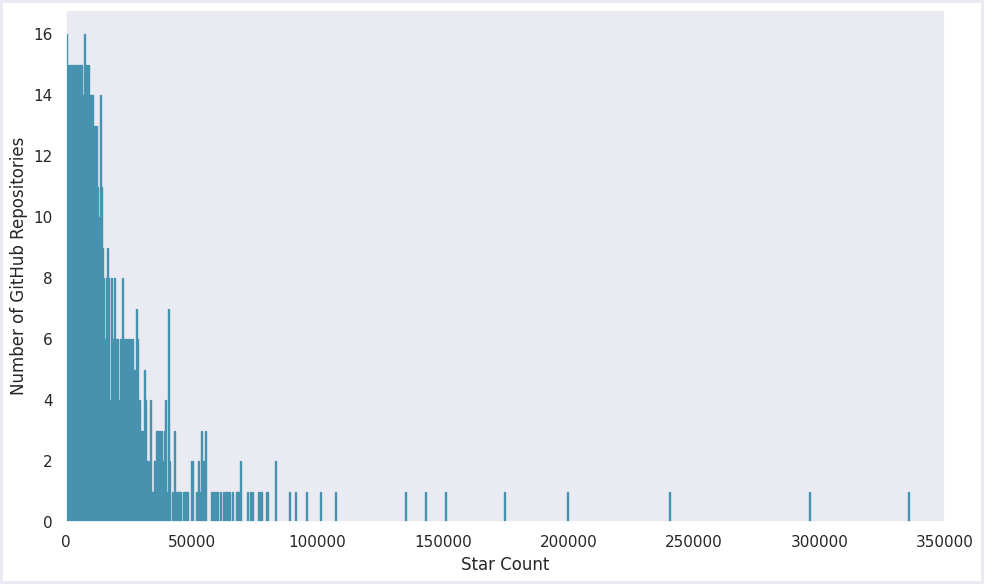

In [78]:
with sns.axes_style('white'):
    sns.set_theme(style='dark')
    fig, ax = plt.subplots(figsize=(10,6)) 
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    # data
    ax.hist(df['stargazers_count'], color='#4793AF', bins=num_of_stars, edgecolor='#4793AF')

    # lable axis x
    ax.set_xlabel('Star Count')

    # lable axis y
    ax.set_ylabel('Number of GitHub Repositories')

    ax.set_xlim(-1,350000)
    # title
    #ax.set_title('GitHub Repositories: Star Count Distribution', fontsize=14, pad=15)

    plt.tight_layout() # format of interval between plots
    plt.show()

    sns.reset_defaults()

In [79]:
fig.savefig("../pngs_ma/github_repos_star_count_distribution.pdf")

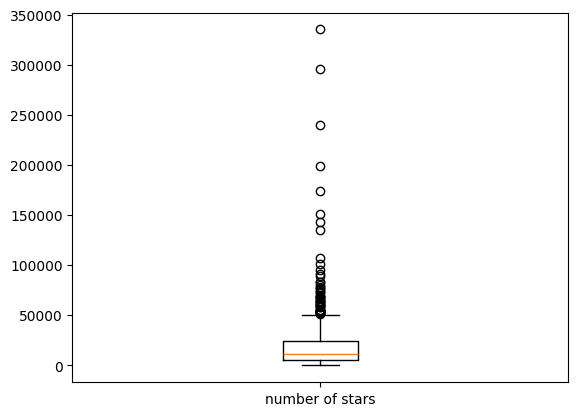

In [37]:
# boxplot for column 'stargazers_count' to visualize the distribution
plt.boxplot(df[['stargazers_count']], tick_labels=['number of stars'])

plt.show()

## Analyse license

In [38]:
# create new column 'license_type' for dataframe
# 'license_type' is value of key-value-pair from the column licenses
# apply(...) --> applies func 'lambda' to every vaule 'x' in the column 'licenses'
# check if 'x' is a dict, if yes, retrieves values of dict as list and select first item
df['license_type'] = df['license'].apply(lambda x: list(x.values())[0] if isinstance(x, dict) else None)

In [39]:
df['license_type'].value_counts() # check which licenses_type the dataframe contains

license_type
mit             255
apache-2.0      192
other           137
gpl-3.0          65
bsd-3-clause     38
agpl-3.0         31
gpl-2.0          10
bsd-2-clause      8
unlicense         6
mpl-2.0           4
cc0-1.0           3
lgpl-3.0          3
cc-by-sa-4.0      3
wtfpl             2
lgpl-2.1          2
isc               2
ofl-1.1           1
cc-by-4.0         1
Name: count, dtype: int64